1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


The dataset is


,x1,x2,x3
0,0.392787,4.595720,5.381295
1,1.139325,2.605090,4.883740
2,-0.149175,0.198281,-0.100069
3,-1.597906,1.527185,-1.668627
4,-1.518131,-5.803877,-8.840139
...,...,...,...
995,-0.192389,1.252098,0.867320
996,-0.930248,0.349541,-1.510956
997,0.654703,6.137537,7.446943
998,0.104079,3.149255,3.357413


Eigenvalues and relative eigenvector (V) of the covariance matrix are:


,eigenvalue,V1,V2,V3
0,2.685245e+01,-0.115997,-0.816497,0.565578
1,-7.259762e-16,-0.576692,-0.408248,-0.707644
2,1.979496e+00,-0.808685,0.408248,0.423512


Eigenvalues and relative eigenvector (v) of the covariance matrix using svd are:


,eigenvalue,u1,u2,u3
0,2.685245e+01,-0.115997,0.565578,-0.816497
1,1.979496e+00,-0.576692,-0.707644,-0.408248
2,1.782572e-17,-0.808685,0.423512,0.408248


The two procedures return the same eigenvectors, but one of the three eigenvalues looks different. The reason might be found in the order of magnitude.

The variabilities of the eigenvectors in relation with the total variance are:


,eigenvalue,V1,V2,V3,variability (%)
0,2.685245e+01,-0.115997,-0.816497,0.565578,9.313436e+01
1,-7.259762e-16,-0.576692,-0.408248,-0.707644,-2.517957e-15
2,1.979496e+00,-0.808685,0.408248,0.423512,6.865635e+00


Given how the dataset is constructed, we know that x2 is a linear combination of x1 and another distribution. So it makes sense that it has a smaller variability.

The reduced dataset is


,x1_rot,x3_rot
0,6.947484,-0.568205
1,5.328780,-1.811848
2,0.047741,0.245462
3,-0.313335,2.620197
4,-10.324389,2.378653
...,...,...
995,1.438639,0.331778
996,-0.928092,1.517158
997,9.475715,-0.970333
998,4.510392,-0.121079


The reduced dataset allows us to retain 100.0 % of the variance.


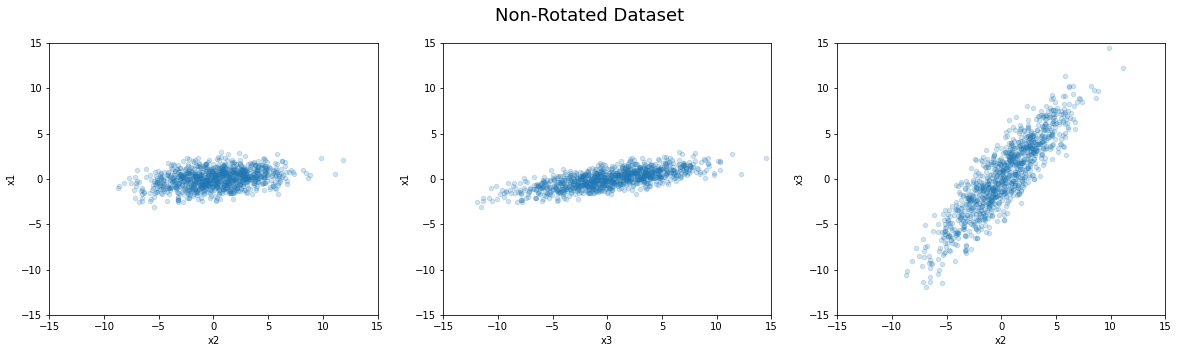

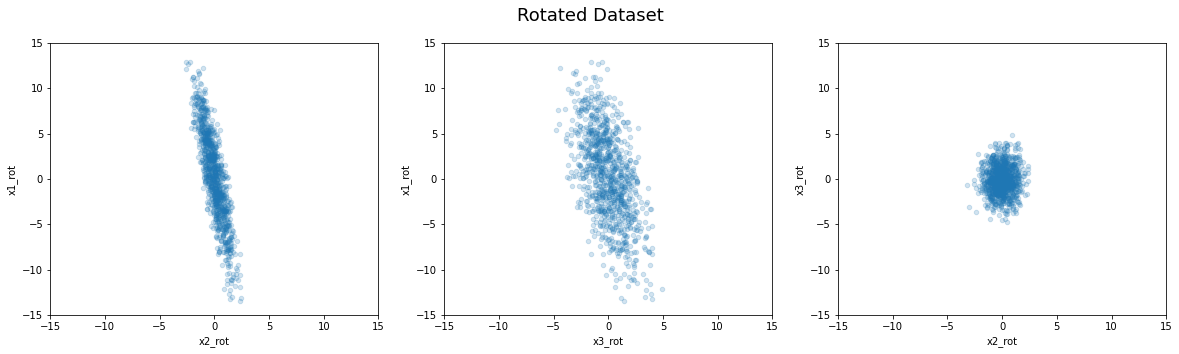

In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn as sns

N=1000
dataset=pd.DataFrame(index = [np.arange(N)], columns=["x1"])
x1=npr.normal(0, 1, N)
x2=x1+npr.normal(0, 3, N)
dataset["x1"]=x1
dataset["x2"]=x2
dataset["x3"]=2*x1+x2
print("The dataset is")
display(dataset)

covariance_matrix=np.cov(dataset.T)
evalues, evectors = la.eig(covariance_matrix) 
print("Eigenvalues and relative eigenvector (V) of the covariance matrix are:")
vx=evectors[:,0]
vy=evectors[:,1]
vz=evectors[:,2]
result=pd.DataFrame(data=np.real_if_close(evalues),columns=['eigenvalue'])
result["V1"]=vx
result["V2"]=vy
result["V3"]=vz
display(result)

U, spectrum, Vt = la.svd(covariance_matrix)
print("Eigenvalues and relative eigenvector (v) of the covariance matrix using svd are:")
ux=U[:,0]
uy=U[:,1]
uz=U[:,2]
resultsvd=pd.DataFrame(data=np.real_if_close(spectrum),columns=['eigenvalue'])
resultsvd["u1"]=ux
resultsvd["u2"]=uy
resultsvd["u3"]=uz
display(resultsvd)
print("The two procedures return the same eigenvectors, but one of the three eigenvalues looks different. The reason might be found in the order of magnitude.")

var=[]
for i in range(len(evalues)):
    var.append(np.real_if_close(evalues[i]/evalues.sum())*100)
print("\nThe variabilities of the eigenvectors in relation with the total variance are:")
result["variability (%)"]=var
display(result)
print("Given how the dataset is constructed, we know that x2 is a linear combination of x1 and another distribution. So it makes sense that it has a smaller variability.\n")
rotdata = np.dot(Vt.T, dataset.T) 
newdataset = pd.DataFrame(rotdata.T, columns = ['x1_rot', 'x2_rot', 'x3_rot'])
dataset_red = newdataset.drop(columns = ['x2_rot'])
print("The reduced dataset is")
display(dataset_red)
print('The reduced dataset allows us to retain',round(var[0]+ var[2],6), '% of the variance.')

fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
dataset.plot.scatter(x="x2",y="x1", ax=ax1, alpha=0.2)
dataset.plot.scatter(x="x3",y="x1", ax=ax2, alpha=0.2)
dataset.plot.scatter(x="x2",y="x3", ax=ax3, alpha=0.2)
fig.suptitle('Non-Rotated Dataset', fontsize=18)

ax1.set_xlim(left=-15, right=15)
ax1.set_ylim(-15, 15)                                        
ax2.set_xlim(left=-15, right=15)
ax2.set_ylim(-15, 15)                                        
ax3.set_xlim(left=-15, right=15)
ax3.set_ylim(-15, 15)    


figr,(ax4,ax5,ax6) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
newdataset.plot.scatter(x="x2_rot",y="x1_rot", ax=ax4,  alpha=0.2)
newdataset.plot.scatter(x="x3_rot",y="x1_rot", ax=ax5, alpha=0.2)
newdataset.plot.scatter(x="x2_rot",y="x3_rot", ax=ax6, alpha=0.2)

ax4.set_xlim(left=-15, right=15)
ax4.set_ylim(-15, 15)                                        
ax5.set_xlim(left=-15, right=15)
ax5.set_ylim(-15, 15)                                        
ax6.set_xlim(left=-15, right=15)
ax6.set_ylim(-15, 15)                                        

figr.suptitle('Rotated Dataset', fontsize=18)

plt.show()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [4]:
from random import randint
dataset1 = dataset.copy()

for i in range(0,10):
    x=npr.normal(0, 1/50, N)
    dataset1['noise'+str(i)] = x
    
display(dataset1)

covariance_matrix1=np.cov(dataset1.T)
U1, spectrum1, Vt1 = la.svd(covariance_matrix1)
print("Eigenvalues and relative eigenvector (v) of the covariance matrix using svd are:")
ux1=U1[:,0]
uy1=U1[:,1]
uz1=U1[:,2]
resultsvd1=pd.DataFrame(data=np.real_if_close(spectrum1),columns=['eigenvalue'])
resultsvd1["u1"]=ux1
resultsvd1["u2"]=uy1
resultsvd1["u3"]=uz1
display(resultsvd1)
var1=[]
for i in range(len(spectrum1)):
    var1.append(np.real_if_close(spectrum1[i]/spectrum1.sum())*100)
print("\nThe variabilities of the eigenvectors in relation with the total variance are:")
resultsvd1["variability (%)"]=var1
display(resultsvd1)

rotdata1 = np.dot(Vt1.T, dataset1.T)
newdataset1 = pd.DataFrame(rotdata1.T)
dataset_red1 = newdataset1.drop([i for i in range(2,13)],axis=1)
dataset_red2 = dataset_red1.rename(columns = {0: 'x1_red', 1: 'x2_red'}, inplace = False)
print("The reduced dataset is")
display(dataset_red2)
print('The reduced dataset allows us to retain',round(var1[0]+ var1[2],6), '% of the variance. Differently from the previous case, we have dropped x3 to mantain at least 90% of the total variability.')




,x1,x2,x3,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9
0,0.392787,4.595720,5.381295,-0.008817,0.014378,-0.001997,0.016442,0.002330,-0.033742,-0.022769,-0.011935,0.007712,-0.008945
1,1.139325,2.605090,4.883740,-0.030992,-0.003816,0.010610,0.031265,-0.020586,-0.021255,0.028943,-0.017368,-0.022092,0.001513
2,-0.149175,0.198281,-0.100069,0.013728,-0.003327,0.006282,0.000778,-0.010351,-0.018430,0.036452,0.039628,0.022086,-0.025280
3,-1.597906,1.527185,-1.668627,0.021126,-0.013594,-0.010358,-0.001374,0.014168,0.017662,0.003100,-0.014845,0.010671,-0.038072
4,-1.518131,-5.803877,-8.840139,-0.015045,0.026260,0.034764,-0.003336,-0.024188,-0.008250,-0.032661,0.001571,0.003451,-0.012813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.192389,1.252098,0.867320,-0.028985,0.003590,0.015392,-0.011581,-0.013318,0.009643,-0.009436,0.012671,-0.002988,-0.020389
996,-0.930248,0.349541,-1.510956,-0.000441,0.016789,-0.017694,-0.029513,0.003307,0.003522,-0.013972,0.012567,0.010167,-0.003863
997,0.654703,6.137537,7.446943,0.024693,0.019151,0.011870,0.037436,0.022809,0.027673,0.008853,-0.002891,0.011854,0.003881
998,0.104079,3.149255,3.357413,-0.033155,0.036866,-0.020848,0.005766,-0.023214,-0.019874,0.008387,0.027901,0.021788,-0.004819


Eigenvalues and relative eigenvector (v) of the covariance matrix using svd are:


,eigenvalue,u1,u2,u3
0,2.685245e+01,-0.115997,0.565577,-0.000130
1,1.979499e+00,-0.576692,-0.707643,0.000216
2,4.667416e-04,-0.808685,0.423511,-0.000045
3,4.467473e-04,-0.000053,-0.000086,-0.048700
4,4.391298e-04,-0.000208,0.000023,-0.300051
5,4.199081e-04,-0.000057,0.000559,-0.313579
6,4.113513e-04,-0.000073,-0.000294,0.514074
7,4.019453e-04,0.000015,-0.000406,-0.252590
8,3.846154e-04,0.000111,0.000231,0.334879
9,3.766752e-04,-0.000101,-0.000018,0.289195



The variabilities of the eigenvectors in relation with the total variance are:


,eigenvalue,u1,u2,u3,variability (%)
0,2.685245e+01,-0.115997,0.565577,-0.000130,9.312126e+01
1,1.979499e+00,-0.576692,-0.707643,0.000216,6.864678e+00
2,4.667416e-04,-0.808685,0.423511,-0.000045,1.618607e-03
3,4.467473e-04,-0.000053,-0.000086,-0.048700,1.549269e-03
4,4.391298e-04,-0.000208,0.000023,-0.300051,1.522852e-03
5,4.199081e-04,-0.000057,0.000559,-0.313579,1.456194e-03
6,4.113513e-04,-0.000073,-0.000294,0.514074,1.426519e-03
7,4.019453e-04,0.000015,-0.000406,-0.252590,1.393900e-03
8,3.846154e-04,0.000111,0.000231,0.334879,1.333802e-03
9,3.766752e-04,-0.000101,-0.000018,0.289195,1.306267e-03


The reduced dataset is


,x1_red,x2_red
0,2.545669,-3.481133
1,1.341811,-2.498823
2,0.108822,-0.064635
3,1.018231,-0.175120
4,-3.115742,4.975426
...,...,...
995,0.713711,-0.783217
996,0.302633,0.287223
997,3.397523,-4.717583
998,1.764679,-2.289776


The reduced dataset allows us to retain 93.122881 % of the variance. Differently from the previous case, we have dropped x3 to mantain at least 90% of the total variability.


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 